# Lateral Movement - Mimikatz Skeleton Key

#### Author: Rifqi Ardia Ramadhan

Mimikatz is a leading post-exploitation tool that dumps passwords from memory, as well as hashes, PINs and Kerberos tickets. One of the method it's used is compromising Domain Controller (DC) to inject a false credentials to create a backdoor on a system. But the key problem (or we can say, detection) in this method is the system shows that it's actually downgraded the encryption from AES to RC4-HMAC (NTLM) encryption type. `mimikatz` is one of the tools that support this method as a module. By default, it's using AES, so we can conclude that anymore lower than that means it's compromised.


## Use Case
### Objective
Identify if there is any compromised DC that allows RC4-HMAC AS-REP request. This use case specifically try to detect from network perspective.

### Log Requirements
Kerberos Traffic

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | AS-REP sent with etype 23| | etype 23 means that it's using ARCFOUR-HMAC-MD5|

### References
https://attack.mitre.org/techniques/T1556/001/

https://attack.mitre.org/software/S0007/

https://www.csoonline.com/article/3353416/what-is-mimikatz-and-how-to-defend-against-this-password-stealing-tool.html

https://www.virusbulletin.com/uploads/pdf/magazine/2016/vb201601-skeleton-key.pdf

### Sample
Dataset acquired from [PCAP-ATTACK](https://github.com/sbousseaden/PCAP-ATTACK)

This will show if an AS-REP responded with RC4 encryption method.

```(kerberos.msg_type == 11) && (kerberos.etype == 23)```

It should show only AS-REP traffic with etype `ARCFOUR`. There should be none.

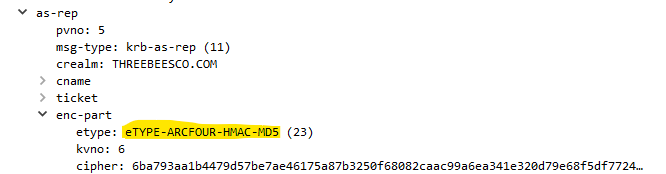

The image above shown at Wireshark is a main indicator that the Domain Controller is compromised.